**Purpose:** Build and create a Convolutional Neural Network (CNN) using tensorflow and keras using the tutorial on their website\
**Author:** Tamim Ahsan\
**Date:** 15 January 2026

# 1. Import packages and load datasets

In [1]:
# Import packages
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CIFAR10 dataset
# This dataset has 10 classes
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 2. Preprocessing

In [3]:
# Normalize the images
# so that the pixel values
# range from 0 to 1
# instead of from 0 to 255
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# See how the labels are distributed in the training dataset
unique, counts = np.unique(train_labels, return_counts=True)
for label, counts in zip(unique, counts):
    print(f"Label: {label}, Count: {counts}")

Label: 0, Count: 5000
Label: 1, Count: 5000
Label: 2, Count: 5000
Label: 3, Count: 5000
Label: 4, Count: 5000
Label: 5, Count: 5000
Label: 6, Count: 5000
Label: 7, Count: 5000
Label: 8, Count: 5000
Label: 9, Count: 5000


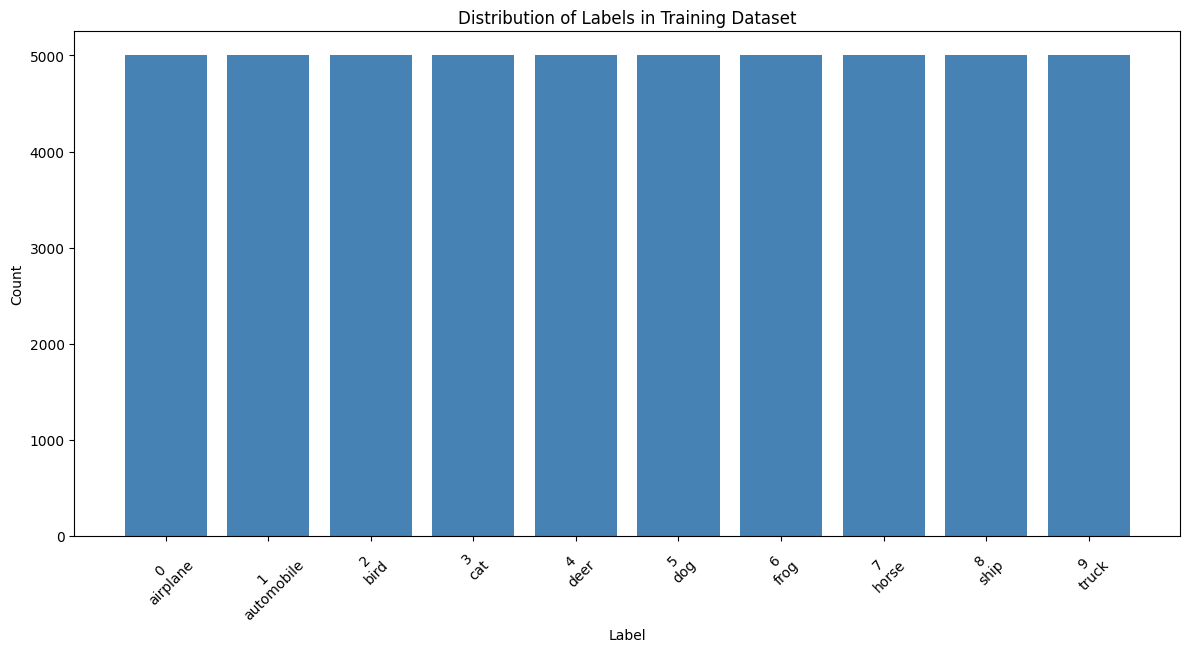

In [5]:
# Visualize the distribution of labels in training dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # names of the classes in the datset
plt.figure(figsize=(12, 6))
plt.bar(unique, counts, color = "steelblue")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Training Dataset")
plt.tight_layout()
plt.xticks(unique, [f"{i}\n{name}" for i, name in enumerate(class_names)], rotation = 45)
plt.show()

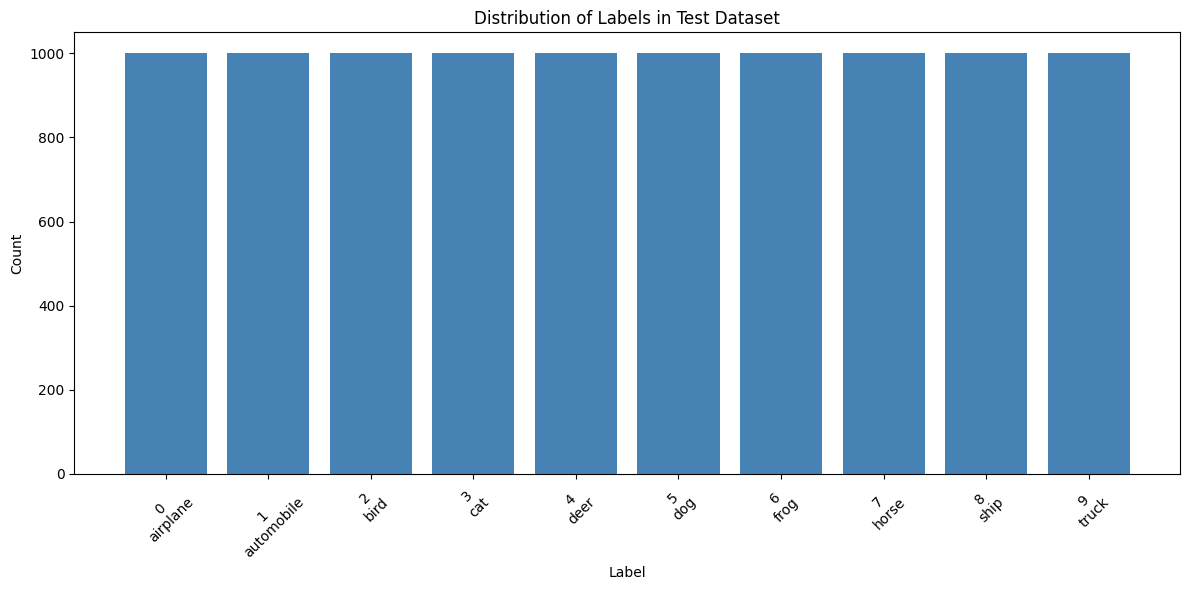

In [6]:
# Visualize the distribution of labels in test dataset
unique, counts = np.unique(test_labels, return_counts=True)
plt.figure(figsize=(12, 6))
plt.bar(unique, counts, color = "steelblue")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Test Dataset")
plt.xticks(unique, [f"{i}\n{name}" for i, name in enumerate(class_names)], rotation = 45)
plt.tight_layout()

**comment:** the label distributions are perfect!

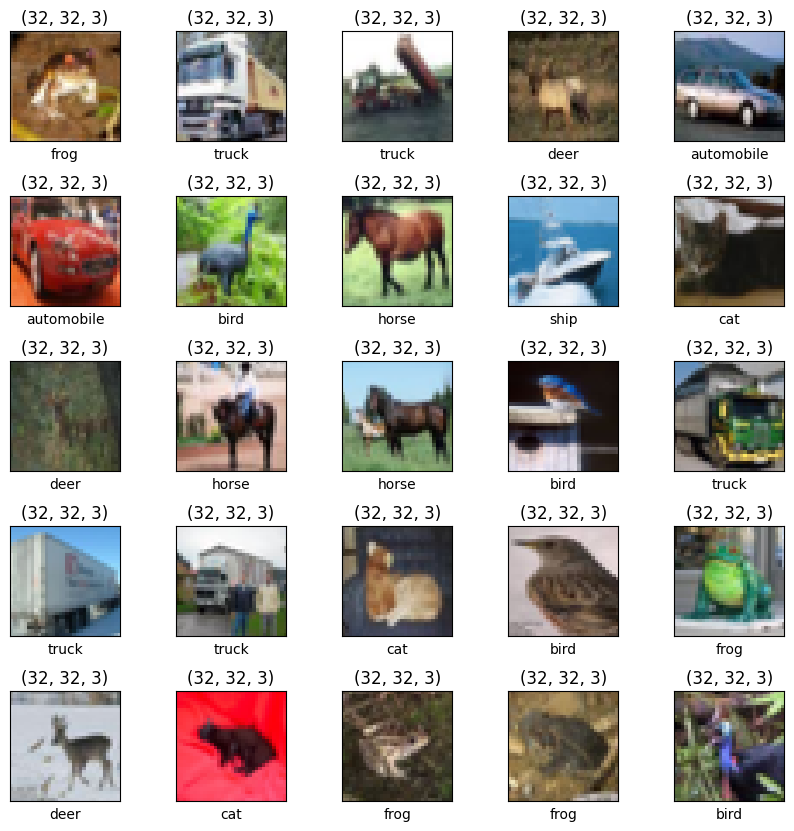

In [7]:
# Look at the figures of the data
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]]) # labels
  plt.title(train_images[i].shape)
  plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# 3. Build and train the CNN
The CNN will have the following components
1. Convolutional layer
2. Pooling layer
3. Fully connected layer

In [8]:
# Build the network
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # convolutional layer with 32 3-by-3 filters
    layers.MaxPooling2D((2,2)), # max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D((2,2)), # max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # convolutional layer
    layers.Flatten(), # flatten into a vector before passing onto the dense layers
    layers.Dense(64, activation='relu'), # dense layer with 64 units
    layers.Dense(10, activation='softmax') # output layer
])

model.summary() # look at the summary of the model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Check the availability of GPUs
# Check if GPU is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# More detailed info
print(tf.config.list_physical_devices('GPU'))

# Check if TensorFlow is built with CUDA
print("Built with CUDA: ", tf.test.is_built_with_cuda())

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Built with CUDA:  True


In [10]:
from prompt_toolkit import history
# Compile and train
# Compile
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # one-hot encoding not needed for integer labels
              metrics = ["accuracy"])

# Train
with tf.device('device:GPU:0'):
  history = model.fit(train_images, train_labels,
                      epochs = 10,
                      validation_data = (test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3583 - loss: 1.7277 - val_accuracy: 0.5463 - val_loss: 1.2585
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5774 - loss: 1.1898 - val_accuracy: 0.6217 - val_loss: 1.0674
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6480 - loss: 1.0045 - val_accuracy: 0.6364 - val_loss: 1.0161
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6827 - loss: 0.9071 - val_accuracy: 0.6854 - val_loss: 0.9051
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7109 - loss: 0.8272 - val_accuracy: 0.7041 - val_loss: 0.8551
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7355 - loss: 0.7625 - val_accuracy: 0.7052 - val_loss: 0.8567
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7464 - loss: 0.7208 - val_accuracy: 0.7162 - val_loss: 0.8188
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7684 - loss: 0.6646 - val_accura

# 4. Evaluation the model

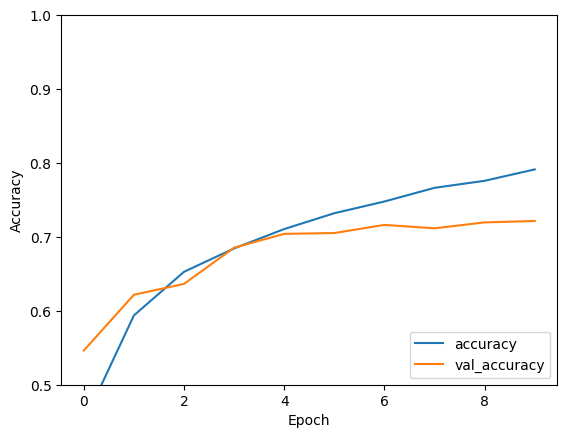

In [11]:
# Look at the accuracy during various epochs of the training process
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = "lower right")

In [12]:
# Test loss and test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.7215 - loss: 0.8377
Test accuracy: 0.7214999794960022
